In [1]:
import cv2
import numpy as np 

In [2]:
#highlight colour range
hsv_lower=[0, 69, 150]
hsv_upper=[200, 255, 255]

image = cv2.imread('test_data/news3.jpeg')
original = image.copy() 
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# rgb to HSV color spave conversion
hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
HSV_lower = np.array(hsv_lower, np.uint8)  # Lower HSV value
HSV_upper = np.array(hsv_upper, np.uint8)  # Upper HSV value

#Threshold
frame_threshed = cv2.inRange(hsv_img, HSV_lower, HSV_upper)
    
# find connected components
contours, hierarchy, = cv2.findContours(frame_threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [3]:
image = cv2.drawContours(image, contours, -1, (0,255,0), 3)

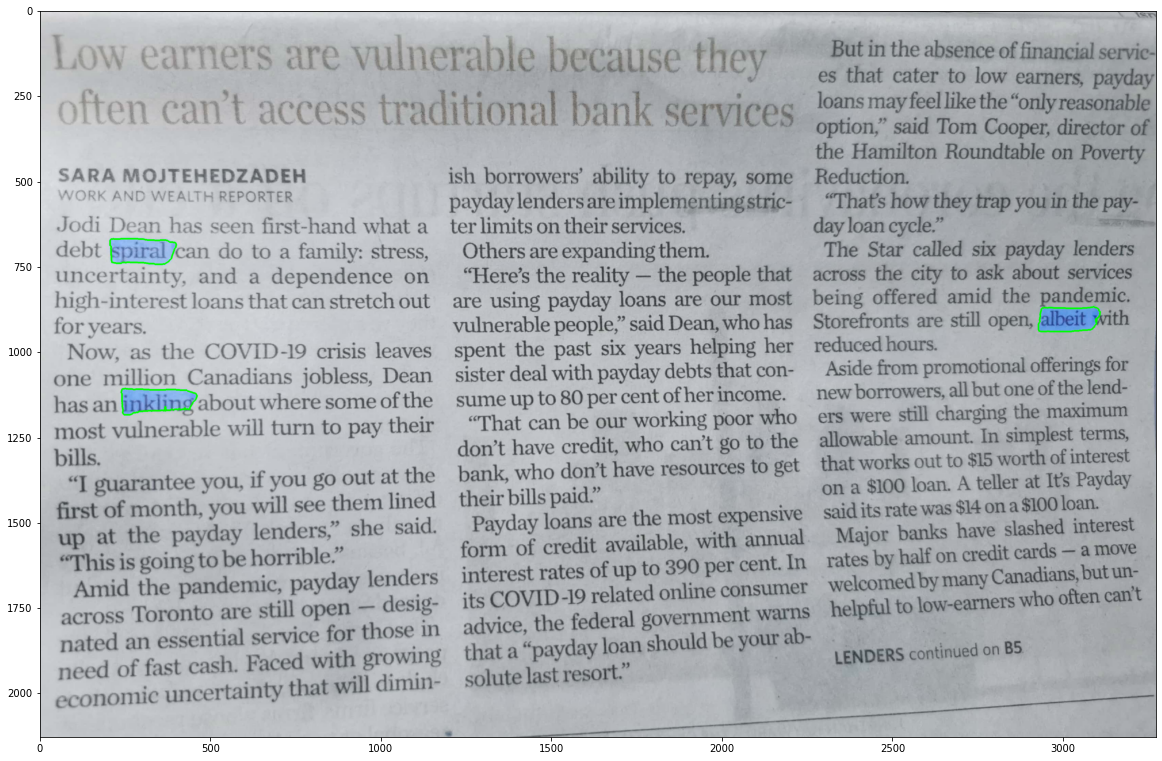

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[20,20])
plt.imshow(image)

In [5]:
import os
import pytesseract

In [6]:
areas = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    areas.append(area)
areas = np.array(areas)
np.mean(areas), np.std(areas), np.mean(areas)+np.std(areas)

(7368.7, 6040.9709534146905, 13409.67095341469)

In [7]:
# get the thresholded image 
def threshold_image(img, v):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret,th = cv2.threshold(gray,v,255,cv2.THRESH_BINARY)
    return th

fa 8 abe eee ~~ se

NDinKineal


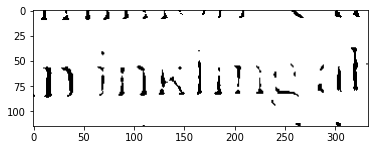

SR RRRRBR Ome

n inkling ak


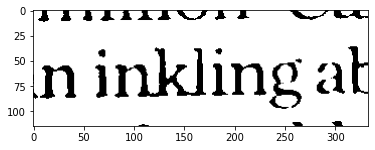

@644244464\/4 —_——

n inkling at


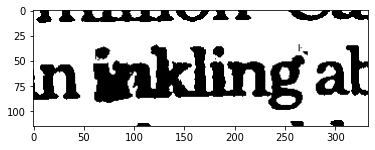

SEE EE EE

1, 1, albeit wil


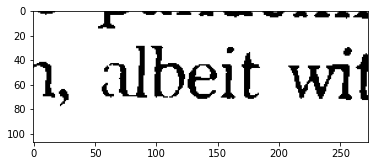

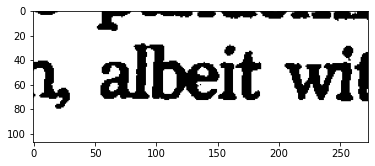

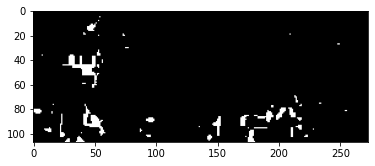

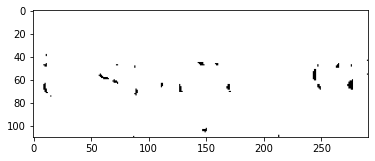

t spiral cz


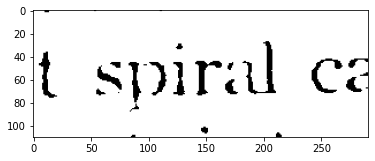

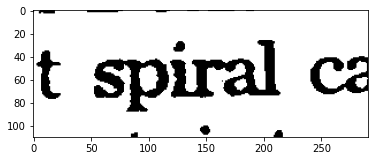

In [8]:
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > np.mean(areas):

        rect = cv2.minAreaRect(cnt)
        big_rect = (rect[0], (1.5*rect[1][0], 1.5*rect[1][1]), rect[2])
        box = cv2.boxPoints(big_rect)
        box = np.int0(box)

        width = int(big_rect[1][0])
        height = int(big_rect[1][1])

        src_pts = box.astype("float32")
        # corrdinate of the points in box points after the rectangle has been
        # straightened
        dst_pts = np.array([[0, height-1],
                            [0, 0],
                            [width-1, 0],
                            [width-1, height-1]], dtype="float32")
        # the perspective transformation matrix
        M = cv2.getPerspectiveTransform(src_pts, dst_pts)

        # directly warp the rotated rectangle to get the straightened rectangle
        warped = cv2.warpPerspective(original, M, (width, height))
        if width < height:
            warped = np.rot90(warped)
#         warped = cv2.warpPerspective(original, M, (width, height), None, cv2.INTER_LINEAR, cv2.BORDER_CONSTANT,
#                                     (255, 255, 255))
        th1 = threshold_image(warped, 120)
        th2 = threshold_image(warped, 150)
        th3 = threshold_image(warped, 180)
        
#         plt.imshow(warped[:,:,::-1]); plt.show()
        
        print(pytesseract.image_to_string(th1))
        plt.imshow(th1, cmap="gray"); plt.show()
        
        print(pytesseract.image_to_string(th2))
        plt.imshow(th2, cmap="gray"); plt.show()
        
        print(pytesseract.image_to_string(th3))
        plt.imshow(th3, cmap="gray"); plt.show()